In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import skimage.data
import tensorflow as tf
from custom_layers_unet_new2 import unet

from skimage.filters import roberts, sobel, scharr, prewitt

In [2]:
def load_data(data_dir):
    data_ = []
    file_order = []
    file_names = [os.path.join(data_dir, f)
        for f in os.listdir(data_dir)]
    file_order =  [ f
        for f in os.listdir(data_dir)]
    for f in file_names[0:500]: # to include full dataset, delete "[0:500]"
        data_.append(skimage.data.imread(f))
    data_ = np.array(data_,dtype='f')
    return data_, file_order

In [3]:
# mask included, yet currently not used
color_dir = './train/color'
color,_ = load_data(color_dir)

mask_dir = './train/mask/'
mask,_ = load_data(mask_dir)

normal_dir = './train/normal/'
normal,_ = load_data(normal_dir)

images_train = np.zeros((len(color),128,128,2),dtype='f')
mask_ = np.zeros((len(color),128,128,1),dtype='f')

images_train[...,0] = color[...,2]
images_train[...,1] = mask
mask_[...,0] = mask != 0

FileNotFoundError: [Errno 2] No such file or directory: './train/color'

In [4]:
images_train = (images_train/255.0-0.5)*2
normal = (normal/255.0-0.5)*2

NameError: name 'images_train' is not defined

In [7]:
image_cur = images_train[0,:,:,0]
my_edge = np.zeros((len(color),128,128),dtype='f') # len(color) = 500

In [8]:
len(color)

500

In [9]:
for i in range(len(color)):
    image_cur = images_train[i,:,:,0]
    my_edge[i,:,:] = sobel(image_cur)

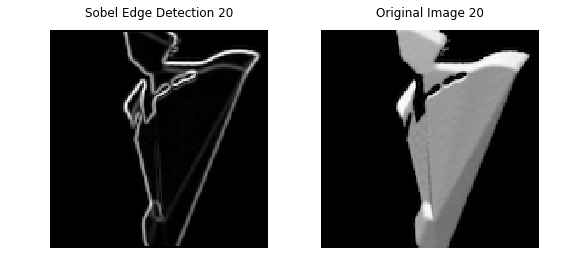

In [12]:
# example:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

# ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
# ax[0].set_title('Roberts Edge Detection')

ax[0].imshow(my_edge[20,:,:], cmap=plt.cm.gray)
ax[0].set_title('Sobel Edge Detection 20')

ax[1].imshow(images_train[20,:,:,0], cmap=plt.cm.gray)
ax[1].set_title('Original Image 20')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()